In [1]:
import sys
sys.path.insert(0, '..')
import pymatcal
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

### Read in the configuration. 

In [2]:
config = pymatcal.get_config('configs/all_ppdfs.yml')

In [3]:
NA = np.prod(config['img nvx'])
NB = config['active dets'].shape[0]
img_subdivs = pymatcal.get_img_subdivs(config['mmpvx'], config['img nsub'])

In [4]:
output = np.empty((NA, NB))
output_area = np.empty((NA, NB))
output_binary = np.empty((NA, NB))


In [5]:
for id in np.indices((NA, NB)).reshape(2, NA*NB).T:
    output[id[0], id[1]] = (pymatcal.get_pair_ppdf(
        id[0], id[1], img_subdivs, config))
  

In [6]:
for id in np.indices((NA, NB)).reshape(2, NA*NB).T:  
    output_area[id[0], id[1]] = (pymatcal.get_pair_ppdf_area(
        id[0], id[1], img_subdivs, config))

In [6]:
for id in np.indices((NA, NB)).reshape(2, NA*NB).T:
    output_binary[id[0], id[1]] = (pymatcal.get_pair_ppdf_binary(
        id[0], id[1], img_subdivs, config))

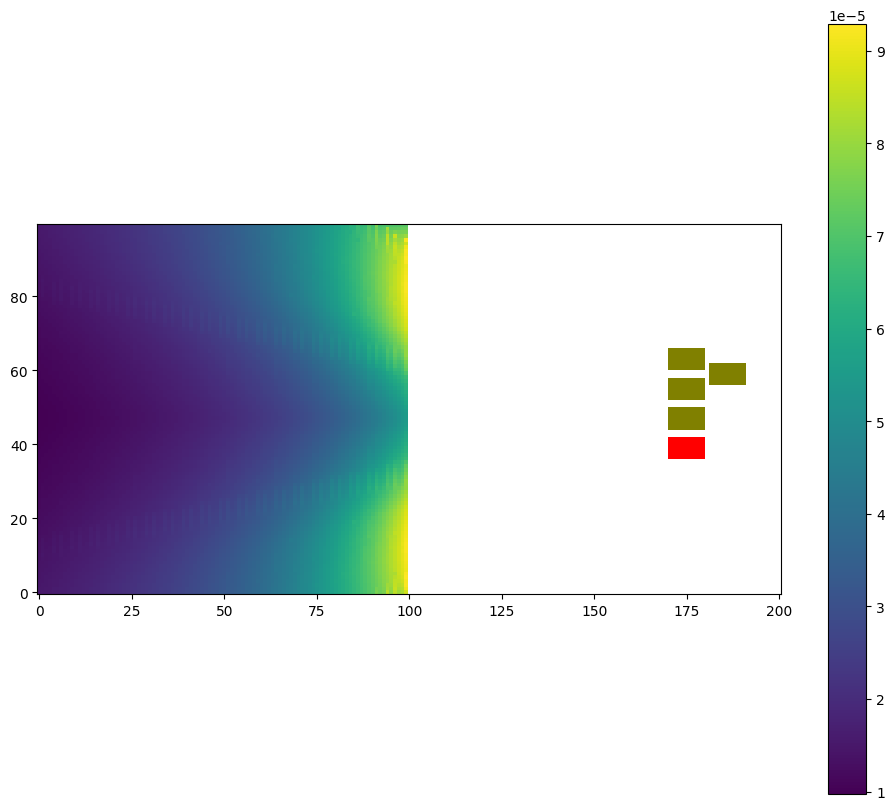

In [6]:
fig, ax = plt.subplots(figsize=(12, 10))

det_dimy = np.max(config['det geoms'][:, 3]) - \
    np.min(config['det geoms'][:, 2])
img_dims = config['img nvx']*config['mmpvx']
mtrans = pymatcal.get_mtransform(
    -config['angle'], config['dist']+img_dims[0]*0.5, img_dims[1]*0.5-det_dimy*0.5)
xy = pymatcal.coord_transform((mtrans[0], np.array(
    [0, 0, 0])), config['det geoms'][:, (0, 2, 4)]+mtrans[1])

det_list = [
    mpl.patches.Rectangle(xy,
                          geom[1] - geom[0], geom[3] - geom[2], angle=config['angle'],
                          rotation_point=(xy[0], xy[1]))
    for xy, geom in zip(xy, config["det geoms"])
]

act_det_list = [
    mpl.patches.Rectangle(xy,
                          geom[1] - geom[0], geom[3] - geom[2], angle=config['angle'],
                          rotation_point=(xy[0], xy[1]))
    for xy, geom in zip(xy, np.array([config["active dets"][0]]))
]

pc_det = mpl.collections.PatchCollection(
    det_list, fc=(0.5, 0.5, 0., 1), ec="none", zorder=10
)
pc_act_det = mpl.collections.PatchCollection(
    act_det_list, fc=(1, 0, 0, 1), ec="none", zorder=10
)
fig.colorbar(ax.imshow(output[:, 0].reshape(
    config['img nvx'][0], config['img nvx'][1]), origin='lower'))
ax.add_collection(pc_det)
ax.add_collection(pc_act_det)
ax.plot(0, 0)

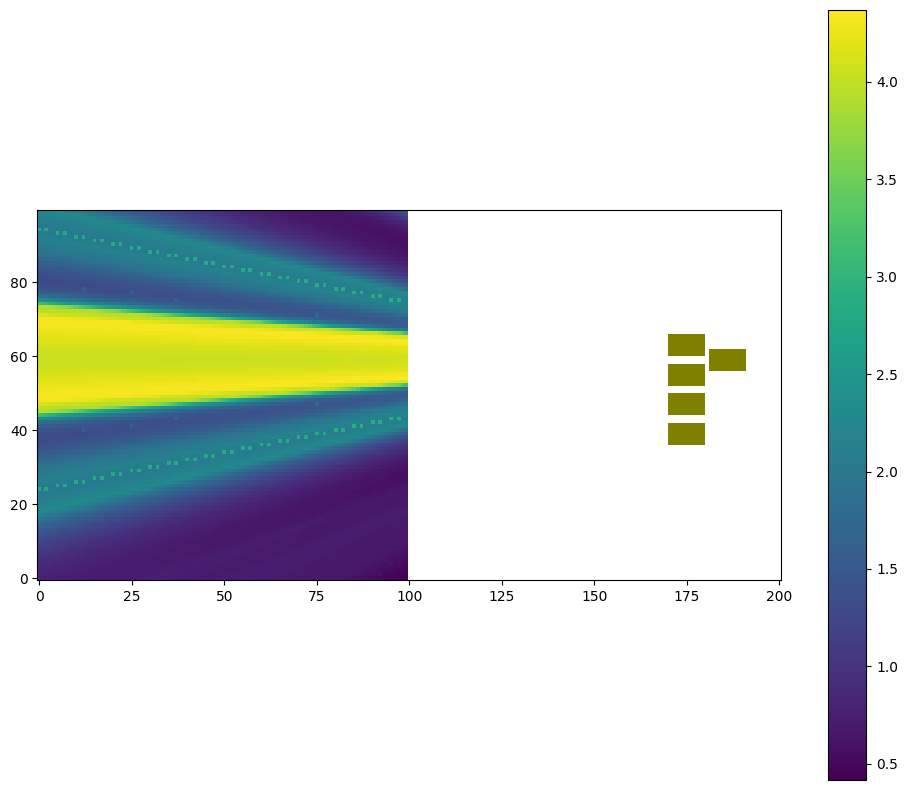

In [9]:
fig, ax = plt.subplots(figsize=(12, 10))

det_dimy = np.max(config['det geoms'][:, 3]) - \
    np.min(config['det geoms'][:, 2])
img_dims = config['img nvx']*config['mmpvx']
mtrans = pymatcal.get_mtransform(
    -config['angle'], config['dist']+img_dims[0]*0.5, img_dims[1]*0.5-det_dimy*0.5)
xy = pymatcal.coord_transform((mtrans[0], np.array(
    [0, 0, 0])), config['det geoms'][:, (0, 2, 4)]+mtrans[1])

det_list = [
    mpl.patches.Rectangle(xy,
                          geom[1] - geom[0], geom[3] - geom[2], angle=config['angle'],
                          rotation_point=(xy[0], xy[1]))
    for xy, geom in zip(xy, config["det geoms"])
]
pc_det = mpl.collections.PatchCollection(
    det_list, fc=(0.5, 0.5, 0., 1), ec="none", zorder=10
)
fig.colorbar(ax.imshow(output_area[:, 0].reshape(
    config['img nvx'][0], config['img nvx'][1]), origin='lower'))
ax.add_collection(pc_det)
ax.plot(0, 0)

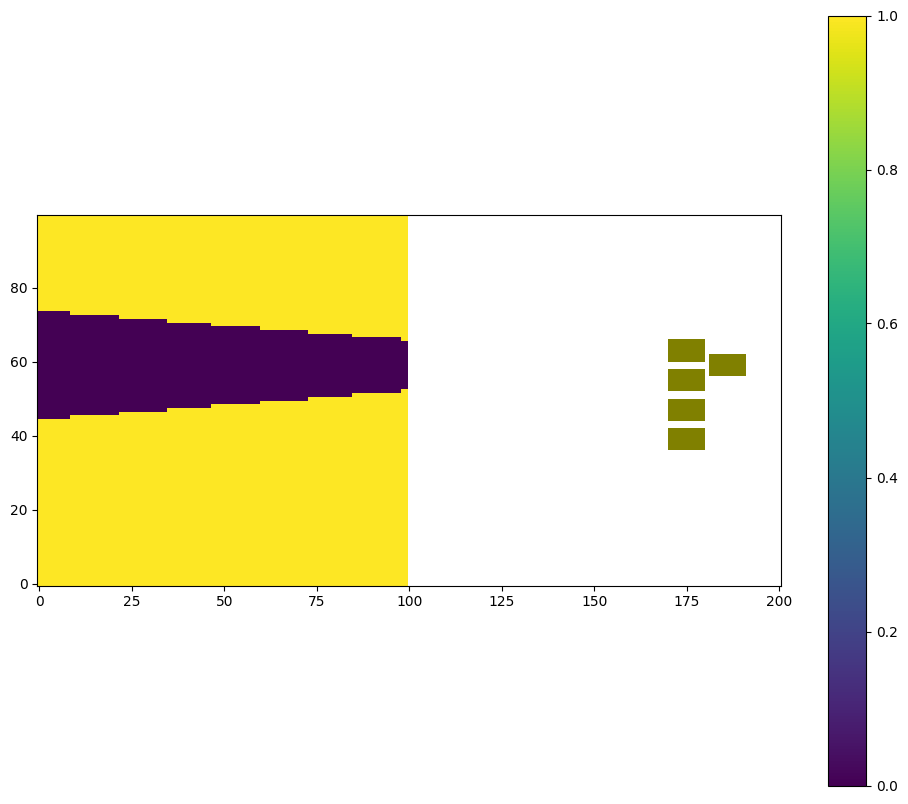

In [7]:
fig, ax = plt.subplots(figsize=(12, 10))

det_dimy = np.max(config['det geoms'][:, 3]) - \
    np.min(config['det geoms'][:, 2])
img_dims = config['img nvx']*config['mmpvx']
mtrans = pymatcal.get_mtransform(
    -config['angle'], config['dist']+img_dims[0]*0.5, img_dims[1]*0.5-det_dimy*0.5)
xy = pymatcal.coord_transform((mtrans[0], np.array(
    [0, 0, 0])), config['det geoms'][:, (0, 2, 4)]+mtrans[1])

det_list = [
    mpl.patches.Rectangle(xy,
                          geom[1] - geom[0], geom[3] - geom[2], angle=config['angle'],
                          rotation_point=(xy[0], xy[1]))
    for xy, geom in zip(xy, config["det geoms"])
]
pc_det = mpl.collections.PatchCollection(
    det_list, fc=(0.5, 0.5, 0., 1), ec="none", zorder=10
)
fig.colorbar(ax.imshow(output_binary[:, 0].reshape(
    config['img nvx'][0], config['img nvx'][1]), origin='lower'))
ax.add_collection(pc_det)
ax.plot(0, 0)